<a href="https://colab.research.google.com/github/vijaygwu/MathematicsOfML/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation and Gradients: A Comprehensive Explanation

**Author:** Dr. Vijay Raghavan  
**Date:** December 11, 2024

## Introduction

Backpropagation is a cornerstone algorithm in training neural networks. It provides a systematic way to compute the gradient of a loss function with respect to each parameter in the network. This knowledge of how changing each parameter (such as a weight or bias) affects the loss is crucial to performing gradient-based optimization methods like gradient descent.

To illustrate this, we will go through concepts, mathematics, and a concrete example using Python code. We will detail every step of the forward and backward pass, making the hidden mechanics of training more transparent.

## Concepts

1. **Neural Network Parameters ($ θ $)**:  
   Parameters are the values that a neural network learns during training. They typically include:
   - **Weights ($ w $)**: Coefficients multiplying the inputs.
   - **Biases ($ b $)**: Constant terms added at each neuron.

2. **Prediction ($Ŷ$)**:  
   When we input data **X** to the network, it produces a prediction **Ŷ**. The prediction depends on the network’s parameters:
   $ \hat{y} = f(X; \theta) $
   where $ ( f ) $ is the neural network function defined by its architecture and parameters θ.

3. **Loss Function ($L(θ) $)**:  
   The loss (or cost) function measures how well the network’s predictions match the true targets **Y**. For example:
   - **Mean Squared Error (MSE)**: For regression,  
     $  L = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2  $
   - **Binary Cross-Entropy**: For binary classification,
    $ L = -\frac{1}{N}\sum_{i=1}^{N}\left[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)\right]
    $

   We want to find parameters θ that minimize $ L(\theta) $.

4. **Gradients**:  
   A gradient tells us how to adjust parameters to reduce the loss. It is the vector of partial derivatives of the loss with respect to each parameter:
   $
   \nabla_{\theta}L = \left( \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial b_1}, \frac{\partial L}{\partial b_2}, \dots \right).
    $

   If $ (\frac{\partial L}{\partial w}) $ is positive, it means increasing that weight $ (w) $ will increase the loss, so we should move $ (w) $ in the opposite direction (i.e., decrease it) to reduce loss.

5. **Chain Rule**:  
   Neural networks are composed of multiple layers. The final output depends on the parameters of each layer. When we take derivatives, we use the chain rule to handle these nested functions. If the network’s final prediction is  $ \hat{y} = f(z) $, where $ ( z ) $ is itself a function of parameters like $ ( z = w \cdot x + b ) $ and then an activation function, we use the chain rule:
   $
   \frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}}\cdot \frac{\partial \hat{y}}{\partial a}\cdot \frac{\partial a}{\partial z}\cdot \frac{\partial z}{\partial w}. $


   Each part corresponds to a stage in the forward pass of the network.

## Forward Pass and Backward Pass Explained

1. **Forward Pass**:  
   Input data flows forward through the network:
   - Compute linear combinations $ z = W x + b $ at each layer.
   - Apply nonlinear activation functions (e.g., sigmoid, ReLU).
   - Eventually produce an output $ \hat{y} $.
   
   The forward pass is straightforward: you start from inputs and move forward through each layer until you reach the prediction.

2. **Backward Pass (Backpropagation)**:  
   To update parameters, we need gradients. Starting from the loss at the output:
   - Compute $ (\frac{\partial L}{\partial \hat{y}}) $ from the chosen loss function.
   - Move backward through the network’s layers. Use the chain rule to relate $ (\frac{\partial L}{\partial \hat{y}}) $ to $ (\frac{\partial L}{\partial w}) $, $ (\frac{\partial L}{\partial b}) $, and so on.
   
   This backward pass essentially "peels off" one layer at a time, computing how each layer contributed to the final error.

3. **Gradient Descent Step**:
   Once we have $ (\frac{\partial L}{\partial w}) $ and $ (\frac{\partial L}{\partial b}) $, we update the parameters:
   $ w_{\text{new}} = w_{\text{old}} - \eta \frac{\partial L}{\partial w}, \quad
   b_{\text{new}} = b_{\text{old}} - \eta \frac{\partial L}{\partial b}
   $
   
   Here, $ \eta $ (the learning rate) determines how large a step we take.

## Detailed Mathematical Example

Consider a single hidden-layer network:

1. **Input Layer**: Two inputs, $ ( x_1, x_2 ) $.
2. **Hidden Layer**: Three neurons with sigmoid activation.
3. **Output Layer**: One linear output neuron.

**Forward Pass Equations**:

- **Hidden Layer Pre-Activation**:
  $
  z_1 = X W_1 + b_1
  $
  where $( W_1 )$ is a 2x3 matrix and $( b_1 )$ is a 1x3 vector.

- **Hidden Layer Activation** (using sigmoid):
  $
  a_1 = \sigma(z_1) = \frac{1}{1+e^{-z_1}}
  $

- **Output Layer Pre-Activation**:
  $
  z_2 = a_1 W_2 + b_2
  $
  where $  W_2 $ is 3x1 and $ b_2  $ is 1x1.

- **Output (Prediction)**:
  $
  \hat{y} = z_2
  $

**Loss (MSE)**:
$
L = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$

**Backward Pass**:

- Start from the output: $ \frac{\partial L}{\partial \hat{y}} $. For MSE:
  $ \frac{\partial L}{\partial \hat{y}} = \frac{2}{N}(\hat{y} - y). $

- Since $ (\hat{y} = z_2) $, we have $ (\frac{\partial L}{\partial z_2} = \frac{\partial L}{\partial \hat{y}}) $.

- To find $ (\frac{\partial L}{\partial W_2}) $:
  $
  \frac{\partial L}{\partial W_2} = a_1^T \frac{\partial L}{\partial z_2}
  $
  and
  $
  \frac{\partial L}{\partial b_2} = \sum \frac{\partial L}{\partial z_2}.
  $

- Next, propagate back to the hidden layer:
  $
  \frac{\partial L}{\partial a_1} = \frac{\partial L}{\partial z_2} W_2^T
  $

- Now apply chain rule for the sigmoid activation:
  $
  \frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial a_1} \odot \sigma'(z_1)
  $
  where $ (\sigma'(z) = \sigma(z)(1-\sigma(z))$.

- Finally, find \(\frac{\partial L}{\partial W_1}\):
  $
  \frac{\partial L}{\partial W_1} = X^T \frac{\partial L}{\partial z_1}
  $
  and
  $
  \frac{\partial L}{\partial b_1} = \sum \frac{\partial L}{\partial z_1}.
  $

With these gradients, we update each parameter accordingly.

## Differences Between Learning Rate and Gradient

- **Gradient**: A result of computation. It indicates how to change parameters to move towards minimizing the loss.
- **Learning Rate $ (\eta) $**: A chosen scalar. You pick it before training begins. It controls how big of a step you take in the gradient’s direction. Without the learning rate, you would know which direction to move but not how far.



## A Practical Example

The following Python code implements a small neural network that learns the function $ ( y = x_1 + x_2 ) $ from random training data. It uses the concepts discussed above. By reviewing the code and comments, you’ll see how backpropagation applies the chain rule step-by-step.

Epoch 0, Loss: 2.0297349398634843
Epoch 100, Loss: 0.5660518069518282
Epoch 200, Loss: 0.07382624372125506
Epoch 300, Loss: 0.0494192361105341
Epoch 400, Loss: 0.03634052800340837
Epoch 500, Loss: 0.02885283550986186
Epoch 600, Loss: 0.024140256593982824
Epoch 700, Loss: 0.02091768911340579
Epoch 800, Loss: 0.018565721284346606
Epoch 900, Loss: 0.016762057188030283
Test input: [[1. 2.]] 
Predicted output: [[2.74693335]] 
Expected output: 3.0


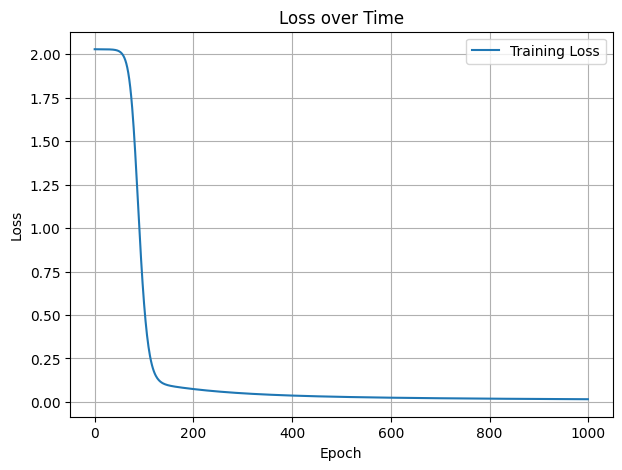

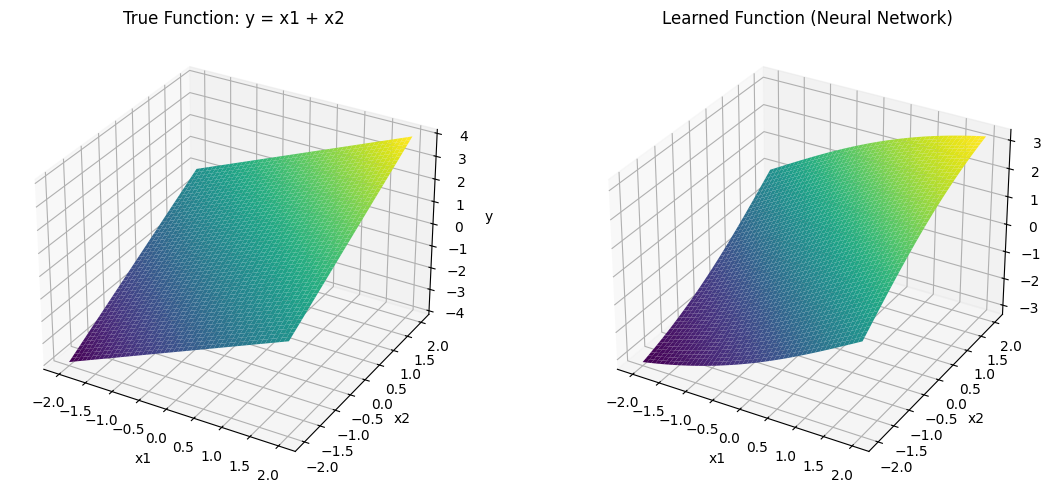

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D visualization

#----------------------------
# Utility Functions
#----------------------------

def sigmoid(x):
    """
    Sigmoid activation: sigma(x) = 1/(1+e^-x)
    Maps any real number into (0,1), introduces non-linearity.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid:
    sigma'(x) = sigma(x)*(1 - sigma(x))
    We compute sigma(x) first, then apply the formula.
    """
    s = sigmoid(x)
    return s * (1 - s)

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error (MSE):
    L = mean((y_true - y_pred)^2)
    Measures average squared difference between predictions and targets.
    """
    return np.mean((y_true - y_pred)**2)

def mse_loss_derivative(y_true, y_pred):
    """
    dL/dy_pred for MSE:
    dL/dy_pred = 2*(y_pred - y_true)/N
    Tells us how changes in predictions affect the overall loss.
    """
    return 2 * (y_pred - y_true) / y_true.shape[0]

#----------------------------
# Data Generation
#----------------------------
# Generate 1000 random (x1, x2) pairs from a normal distribution
# Our true function: y = x1 + x2
N = 1000
X = np.random.randn(N, 2)   # Shape: (1000, 2)
y = (X[:, 0:1] + X[:, 1:2]) # Shape: (1000, 1)

#----------------------------
# Network Initialization
#----------------------------
# Architecture:
# Input: 2 features
# Hidden layer: 3 neurons (with sigmoid activation)
# Output: 1 neuron (linear, no activation)
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.1

# Initialize weights and biases with small random values
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

#----------------------------
# Training Settings
#----------------------------
epochs = 1000
losses = []

#----------------------------
# Training Loop
#----------------------------
for epoch in range(epochs):
    # FORWARD PASS:
    # 1. Compute hidden layer pre-activation: z1 = XW1 + b1
    z1 = X.dot(W1) + b1
    # 2. Apply activation: a1 = sigmoid(z1)
    a1 = sigmoid(z1)
    # 3. Compute output layer pre-activation: z2 = a1W2 + b2
    z2 = a1.dot(W2) + b2
    # 4. Since output is linear, y_pred = z2
    y_pred = z2

    # Compute loss:
    loss = mse_loss(y, y_pred)
    losses.append(loss)

    # BACKPROPAGATION:
    # dL/dy_pred:
    dL_dy_pred = mse_loss_derivative(y, y_pred)

    # Since y_pred = z2, dL/dz2 = dL/dy_pred
    dL_dz2 = dL_dy_pred

    # Gradients for W2, b2:
    # dL/dW2 = a1^T * dL/dz2
    dL_dW2 = a1.T.dot(dL_dz2)
    # dL/db2 = sum of dL/dz2 over all samples
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    # Backprop into hidden layer:
    # dL/da1 = dL/dz2 * W2^T
    dL_da1 = dL_dz2.dot(W2.T)

    # dL/dz1 = dL/da1 * sigmoid_derivative(z1)
    dL_dz1 = dL_da1 * sigmoid_derivative(z1)

    # Gradients for W1, b1:
    # dL/dW1 = X^T * dL/dz1
    dL_dW1 = X.T.dot(dL_dz1)
    # dL/db1 = sum of dL/dz1 over samples
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # Parameter updates:
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

#----------------------------
# Testing the network
#----------------------------
# Test the model with a known input: (1.0, 2.0) -> expected output: 3.0
test_input = np.array([[1.0, 2.0]])
test_z1 = test_input.dot(W1) + b1
test_a1 = sigmoid(test_z1)
test_pred = test_a1.dot(W2) + b2
print("Test input:", test_input,
      "\nPredicted output:", test_pred,
      "\nExpected output: 3.0")

#----------------------------
# Visualization: Loss Over Time
#----------------------------
plt.figure(figsize=(7,5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.legend()
plt.grid(True)
plt.show()

#----------------------------
# Visualization: True vs Learned Function
#----------------------------
# Plot a grid of points and compare the true function y=x1+x2 to the model’s predictions

x_lin = np.linspace(-2, 2, 50)
X1_grid, X2_grid = np.meshgrid(x_lin, x_lin)
X_grid = np.column_stack((X1_grid.ravel(), X2_grid.ravel()))

Y_true = X1_grid + X2_grid
z1_grid = X_grid.dot(W1) + b1
h1_grid = sigmoid(z1_grid)
Y_pred = (h1_grid.dot(W2) + b2).reshape(X1_grid.shape)

fig = plt.figure(figsize=(12,5))

# True function surface
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X1_grid, X2_grid, Y_true, cmap='viridis', edgecolor='none')
ax.set_title('True Function: y = x1 + x2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Learned function surface
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X1_grid, X2_grid, Y_pred, cmap='viridis', edgecolor='none')
ax2.set_title('Learned Function (Neural Network)')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y_pred')

plt.tight_layout()
plt.show()


## Analysis

- As training progresses, the loss should decrease.
- Eventually, for the test input (1.0, 2.0), the prediction should approach the target value (3.0).
- The network "learns" the mapping \( y = x_1 + x_2 \) by adjusting weights and biases based on the gradients calculated via backpropagation.

## Summary

- **Backpropagation** uses the chain rule to connect how a small parameter change affects the final loss.
- **Gradients** tell us the direction to move in parameter space to reduce loss.
- **Learning Rate** scales the step size taken along the gradient.
- **Training** involves repeatedly performing forward passes to calculate loss, backward passes to find gradients, and updates to the parameters.

**Note on the Bias term**

The **bias term** in a neuron (or a node within a neural network layer) is an additional parameter that the network learns during training. It serves as a constant offset in the calculation that transforms inputs into outputs before the activation function is applied.

Here’s why the bias is important and how it works:

1. **Mathematical Role**:  
   Consider a single neuron receiving an input vector $ x = (x_1, x_2, \dots, x_n)  $ and having a corresponding weight vector  $ w = (w_1, w_2, \dots, w_n)  $. Without a bias, the neuron’s pre-activation output  $ z  $ is computed as a linear combination of the inputs and weights:

  $ z  = w_1 x_1 + w_2 x_2 + \dots + w_n x_n $
  
  If we include a bias term  $ b  $, this becomes:
  
  $ z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b $

   The bias  $ b  $ shifts the result of the weighted sum of the inputs. This shift ensures that even if all input features are zero, the neuron can still produce a non-zero output. In other words, the neuron’s activation isn’t solely dependent on the inputs; it has a baseline level.

2. **Interpretation in a Geometric Sense**:  
   Without the bias term, each neuron’s output is a linear function that always passes through the origin  $ (0,0,...,0)  $ in the input space. The bias allows the linear function to shift away from the origin. In a 2D analogy, if you think of a line  $ (y = w_1x)  $, it always passes through the origin. By adding a bias,  $ (y = w_1x + b)  $, the line can be moved up or down. This flexibility is crucial for modeling a wide range of functions that don’t necessarily intersect the origin.

3. **Enabling More Complex Decision Boundaries**:  
   In classification tasks, a neuron (or a layer) might represent a decision boundary (e.g., in a binary classification problem). Without a bias, these boundaries are restricted in how they can be positioned. By introducing a bias, the decision boundary can be adjusted freely in the input space, allowing the model to separate data more effectively.

4. **Learning the Bias**:  
   Like weights, biases are parameters that the model learns from data. They are initialized (often to zero or small random values) and updated during training via backpropagation and gradient descent, just like weights. The gradients for the bias term typically involve summing over the relevant partial derivatives, which is straightforward since the bias is added as a constant.

5. **Invariance to Input Shift**:  
   Because the bias is a free parameter not tied directly to any input, the neuron can adapt to input distributions more effectively. For instance, if input features are normalized to have zero mean, the bias can help the neuron output positive or negative activations regardless of the input’s mean value.

In summary, the bias term is a learned constant offset that complements the weighted sum of inputs. Its presence gives each neuron greater representational power by allowing the output to shift up or down and by enabling more flexible decision boundaries. It is as essential to the learning process as the weights themselves, helping ensure that the network can model a wide variety of functions and mappings.